data Boston

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# cargando los datos
Boston= pd.read_csv("3.1 Boston.csv",sep=";")
Boston

FileNotFoundError: [Errno 2] No such file or directory: '3.1 Boston.csv'

In [191]:
Boston['chas'] = Boston['chas'].astype('object')

In [192]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       506 non-null    int64  
 1   crim     506 non-null    float64
 2   zn       506 non-null    float64
 3   indus    506 non-null    float64
 4   chas     506 non-null    object 
 5   nox      506 non-null    float64
 6   rm       506 non-null    float64
 7   age      506 non-null    float64
 8   dis      506 non-null    float64
 9   rad      506 non-null    int64  
 10  tax      506 non-null    int64  
 11  ptratio  506 non-null    float64
 12  black    506 non-null    float64
 13  lstat    506 non-null    float64
 14  medv     506 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 59.4+ KB


In [193]:
# observando numero de datos y variables
Boston.shape

(506, 15)

In [194]:
Boston.isna().sum()

,0
id,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [195]:
#  algunas estadísticas descriptivas de nuestros datos
Boston.describe()

,id,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [196]:
Boston = Boston.drop(columns=["id"])

In [197]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [198]:
Boston.shape

(506, 14)

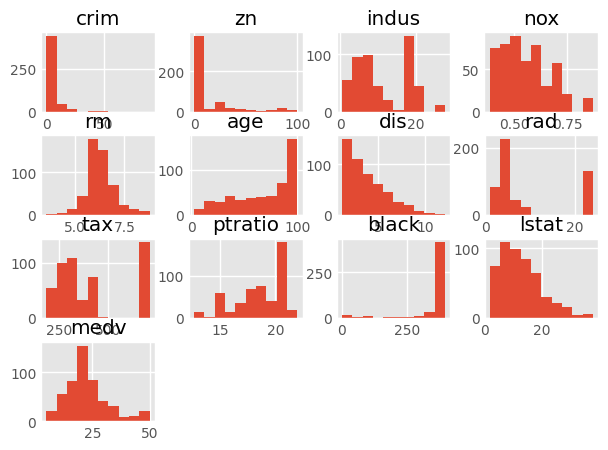

In [199]:
Boston.hist()
plt.show()

Relación entre variables

In [200]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)

corr_matrix = Boston.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
111,tax,rad,0.910228,0.910228
99,rad,tax,0.910228,0.910228
81,dis,nox,-0.769230,0.769230
45,nox,dis,-0.769230,0.769230
41,nox,indus,0.763651,0.763651
29,indus,nox,0.763651,0.763651
71,age,dis,-0.747881,0.747881
83,dis,age,-0.747881,0.747881
167,medv,lstat,-0.737663,0.737663
155,lstat,medv,-0.737663,0.737663


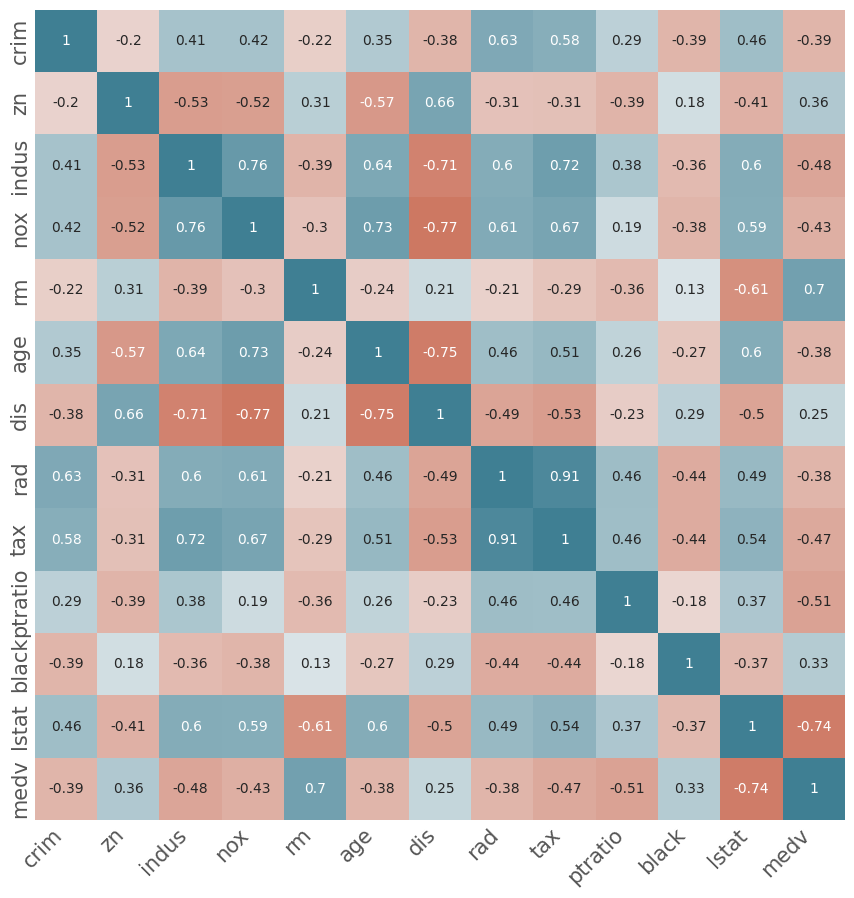

In [201]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 15)

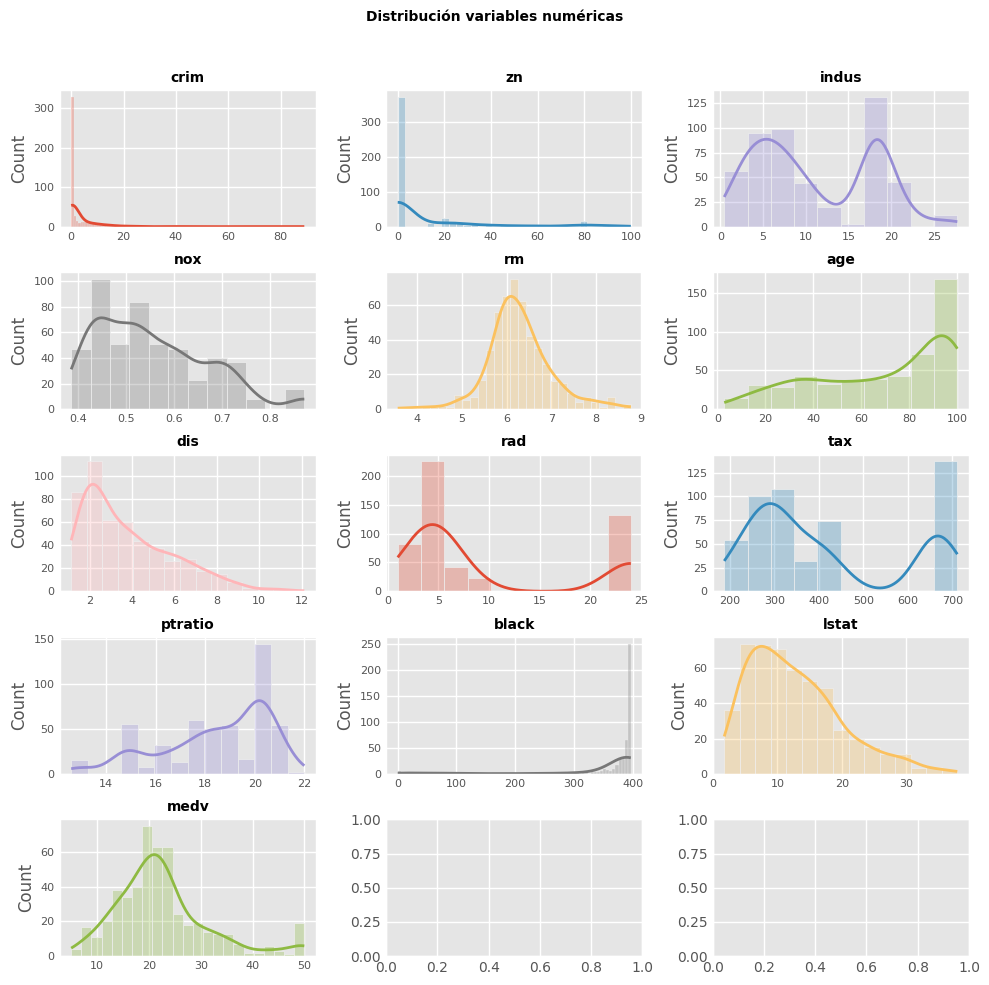

In [202]:
# Gráfico de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
axes = axes.flat
columnas_numeric = Boston.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = Boston,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Ajuste del modelo

In [203]:
# División de los datos en dependiente e independientes
X = Boston[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]
y = Boston['medv']

dividiendo la data en training 80% y test 20%

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [205]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [206]:
X_test.shape, y_test.shape

((102, 13), (102,))

Entrenar el modelo:

In [207]:
# modelo
modelo = LinearRegression()
# entrenamos el modelo
modelo.fit(X=X_train, y=y_train)

LinearRegression()

Hacer predicciones y evaluar el modelo
(Predicting the Test set results)

In [208]:
y_pred1 = modelo.predict(X_test)

In [209]:
y_pred1

array([21.3202139 , 23.90902024, 12.26940741, 22.08196347, 14.21128569,
       27.22686482, 21.0182243 , 19.3749509 , 26.59939696, 33.77377105,
       17.22681337, 21.89480829, 23.15061252, 15.70111267, 18.8645328 ,
       21.23340055, 11.59593559, 17.97899666, 20.31968977,  7.53322288,
       30.27217988, 16.19440904, 20.71667095, 18.97144937, 29.33607497,
       20.91698218, 22.24324853, 25.1657485 , 20.51629624, 21.09484287,
       21.17704026, 14.02428887, 18.9511509 , 16.95890492, 23.86430859,
       19.44977186, 29.50861918, 21.17291105,  6.95616723,  7.71418923,
        8.2926498 , 19.77206706, 37.65887092, 32.7766766 , 18.19574599,
       28.96461123, 19.09771985, 38.83205095, 15.27747366, 27.27253052,
       18.73085702, 32.85404889, 33.26850806, 24.00554399, 32.84399574,
       33.09077245,  9.1716038 , 29.07754104, 24.2188123 , 23.63506868,
       34.36067497, 17.40077166, 26.01724047, 32.22196188, 13.94835189,
       21.08072019, 35.42794186, 19.95091655, 35.8543742 , 36.68

In [210]:
# vamos a predicir
nuevo_x = np.array([0.006,18,2.31,0,0.53,6.57,65,4.09,1,296,15.3,396.90,4.98])
prediccion = modelo.predict(nuevo_x.reshape(1, -1))
print(prediccion)

[29.79060449]


In [211]:
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred1)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 23.964571384956887
Raíz del Error Cuadrático Medio (RMSE) = 4.895362232251755


In [212]:
# calculamos el coeficiente de determinación R2
r2 = modelo.score(X_test, y_test)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.7665382927362872


UTILIZANDO statsmodels
permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos.


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [214]:
# Creación del modelo utilizando matrices como en scikitlearn
# Añadir una constante para el intercepto
# no calcula variables cualitativas (object)
X_train = sm.add_constant(X_train, prepend=True)
X_train = X_train.drop(columns=["chas"])
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     82.96
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.65e-99
Time:                        00:42:17   Log-Likelihood:                -1202.1
No. Observations:                 404   AIC:                             2430.
Df Residuals:                     391   BIC:                             2482.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9401      5.888      7.803      0.0

In [215]:
# no significativas indus, age
# modelo eliminando las ariable sno significativas

In [216]:
X_train = sm.add_constant(X_train, prepend=True)
X_train = X_train.drop(columns=["indus","age"])
modelo2 = sm.OLS(endog=y_train, exog=X_train,)
modelo2 = modelo2.fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     99.82
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.32e-101
Time:                        00:42:17   Log-Likelihood:                -1202.4
No. Observations:                 404   AIC:                             2427.
Df Residuals:                     393   BIC:                             2471.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6934      5.866      7.790      0.0

In [217]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo2.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,34.160777,57.226120
crim,-0.183658,-0.031405
zn,0.030137,0.090442
nox,-27.240471,-11.366295
rm,2.042911,3.873485
dis,-2.241901,-1.360220
rad,0.203642,0.491358
tax,-0.021525,-0.006097
ptratio,-1.341461,-0.761591
black,0.004822,0.016553


Predicciones

In [218]:
predicciones = modelo2.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
221,21.721191,0.735016,20.276136,23.166247,12.150639,31.291744
375,24.926965,0.857703,23.240706,26.613224,15.317034,34.536895
450,15.665001,1.042139,13.616137,17.713866,5.984860,25.345143
163,37.841838,1.025234,35.826208,39.857468,28.168676,47.515000


In [219]:
X_test = X_test.drop(columns=["chas","indus","age"])

In [220]:
# Error de test del modelo
from sklearn.metrics import mean_squared_error
X_test = sm.add_constant(X_test, prepend=True)

predicciones = modelo2.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 4.858421158188693


 Diagnóstico de los resíduos

In [221]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
prediccion_train = modelo2.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

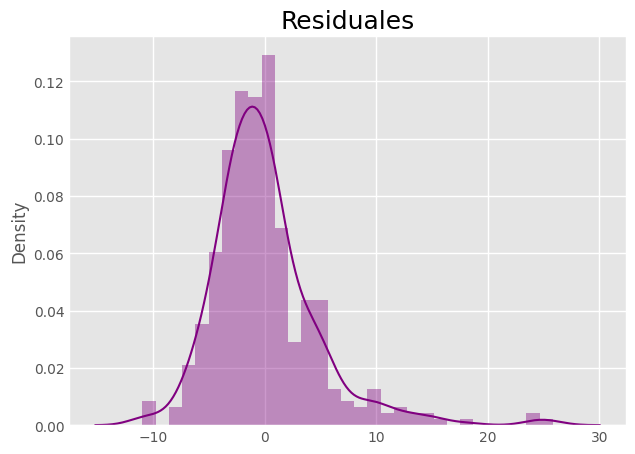

In [222]:
sns.distplot(y_train-prediccion_train,color='purple')
plt.title('Residuales',size=18);

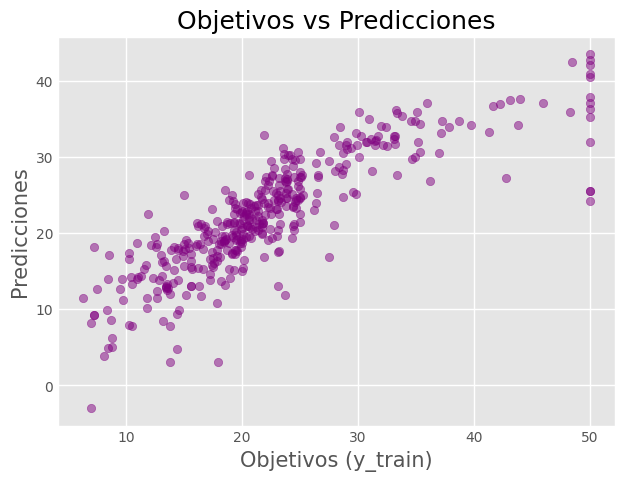

In [223]:
plt.scatter(y_train,prediccion_train,alpha=.5,color='purple')
plt.xlabel('Objetivos (y_train)',size=15)
plt.ylabel('Predicciones',size=15)
plt.title('Objetivos vs Predicciones',size=18);

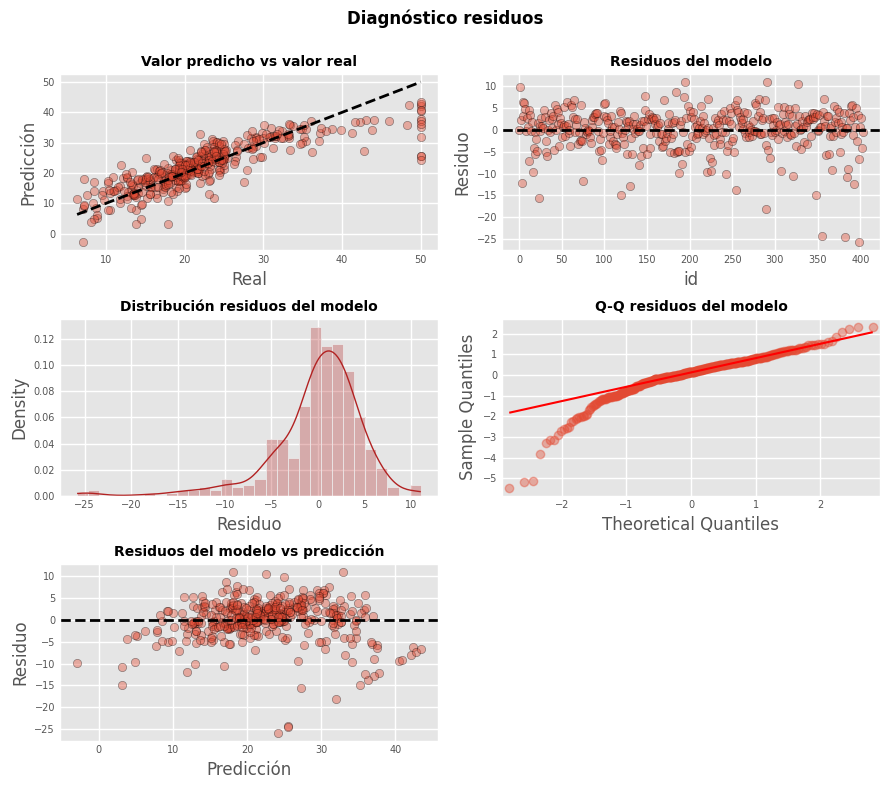

In [224]:
# Gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [225]:
# Normalidad de los residuos Shapiro-Wilk test
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.8868543710892143, pvalue=1.130182177487348e-16)

In [226]:
# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 161.75769577713498, p-value = 7.494845062440057e-36


Text(0, 0.5, 'residuales')

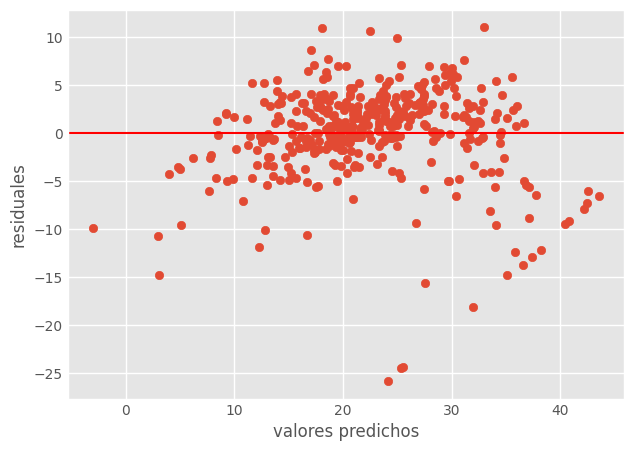

In [227]:
# heterocedaticidad
plt.scatter(modelo.predict(), residuos_train)
plt.axhline(0,color="red")
plt.xlabel("valores predichos")
plt.ylabel("residuales")

In [228]:
# test de pagan
breusch_pagan = sms.het_breuschpagan (modelo.resid, modelo.model.exog)[1]
print(breusch_pagan)

7.094412834380888e-06


In [229]:
if breusch_pagan > 0.05:
  print ("no es heterosedatica")
if breusch_pagan < 0.05:
  print ("es heterosedastica")

es heterosedastica


In [230]:
# autocorrelacion
# test Ljung-Box.
test_ljung = sms.acorr_ljungbox(residuos_train, lags=10)
print(test_ljung)

     lb_stat  lb_pvalue
1   0.422741   0.515573
2   0.639029   0.726502
3   0.643860   0.886322
4   0.645179   0.957913
5   2.665215   0.751433
6   4.929910   0.552834
7   4.973469   0.663201
8   5.166220   0.739672
9   5.191562   0.817300
10  5.419954   0.861420


In [231]:
# predicciones
#Pronóstico
y_pred = modelo2.predict(X_test);
print (y_pred); # valor de prueba de salida

64     21.562993
100    24.228821
400    12.451738
485    21.984162
454    14.387599
         ...    
350    19.264554
191    30.169426
239    28.312556
109    19.881437
219    27.192874
Length: 102, dtype: float64


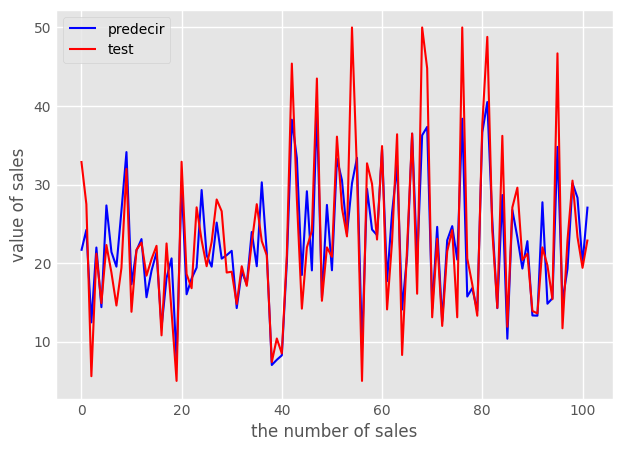

In [232]:
plt.figure();
plt.plot (range (len (y_pred)), y_pred, 'b', label = "predecir"); #x: el valor en el eje x y: el valor en el eje y ls: el estilo de línea de el gráfico de líneas lw: la línea Ancho de línea del gráfico etiqueta: texto de la etiqueta para marcar el contenido del gráfico
plt.plot(range(len(y_test)),y_test,'r',label="test");
plt.xlabel("the number of sales");
plt.ylabel("value of sales");
plt.legend (); # Se usa para mostrar la etiqueta de la etiqueta en la función de trazado
plt.show();


**Selección de los mejores predictores**
Procedimiento de selección de variables hacia adelante (forward) utilizando como criterio de bondad la métrica especificada. El procedimiento se detiene cuando no es posible mejorar más el modelo añadiendo variables.

Parameters

X: pd.DataFrame   :Matriz de predictores

y: pd.Series     : Variable respuesta

metrica: str, default='aic'  : Métrica utilizada para seleccionar las variables.'aic', 'bic', 'rsquared_adj'.

add_constant: bool, default=True     : Si `True` añade una columna de 1s a la matriz de predictores con elcon el nombre de intercept.

verbose: bool, default=True  :   Si `True` muestra por pantalla los resultados de cada iteración.
    
Returns:

seleccion: list    :Lista con las variables seleccionadas.

In [233]:
# cargando los datos
Boston= pd.read_csv("3.1 Boston.csv",sep=";")
Boston

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [234]:
Boston['chas'] = Boston['chas'].astype('object')

In [235]:
# División de los datos en dependiente e independientes
X = Boston[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]
y = Boston['medv']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [237]:
X_train = X_train.drop(columns=["chas"])

In [238]:
# Funciones de selecciçon forward para modelos lineales de statsmodels

def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})
    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)

In [239]:
# Selección de variables metodo forward
predictores = forward_selection(
    X            = X_train,
    y            = y_train,
    criterio     = 'aic',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['rm'] | aic: 2782.697
variables: ['rm', 'lstat'] | aic: 2548.532
variables: ['rm', 'lstat', 'ptratio'] | aic: 2529.555
variables: ['rm', 'lstat', 'ptratio', 'black'] | aic: 2500.876
variables: ['rm', 'lstat', 'ptratio', 'black', 'dis'] | aic: 2494.937
variables: ['rm', 'lstat', 'ptratio', 'black', 'dis', 'zn'] | aic: 2486.554
variables: ['rm', 'lstat', 'ptratio', 'black', 'dis', 'zn', 'tax'] | aic: 2484.890
variables: ['rm', 'lstat', 'ptratio', 'black', 'dis', 'zn', 'tax', 'rad'] | aic: 2482.804
variables: ['rm', 'lstat', 'ptratio', 'black', 'dis', 'zn', 'tax', 'rad', 'crim'] | aic: 2481.052


['black', 'crim', 'dis', 'lstat', 'ptratio', 'rad', 'rm', 'tax', 'zn']

In [240]:
# backward
def backward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:
    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    # Se inicia con todas las variables como predictores
    seleccion = X.columns.to_list()
    modelo  = sm.OLS(endog=y, exog=X[seleccion])
    modelo_res = modelo.fit()
    ultima_metrica = getattr(modelo_res, criterio)
    mejor_metrica = ultima_metrica
    if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    while seleccion:
        metricas = []
        for candidata in seleccion:
            seleccion_temp = seleccion.copy()
            seleccion_temp.remove(candidata)
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                peor_variable = seleccion[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                peor_variable = seleccion[np.argmin(metricas)]
            else:
                break

        seleccion.remove(peor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)

In [241]:
predictores= backward_selection(
    X            = X_train,
    y            = y_train,
    criterio     = 'aic',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'] | aic: 2486.592
variables: ['crim', 'zn', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'] | aic: 2484.681
variables: ['crim', 'zn', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'] | aic: 2482.796
variables: ['crim', 'zn', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'] | aic: 2481.052


['black', 'crim', 'dis', 'lstat', 'ptratio', 'rad', 'rm', 'tax', 'zn']

In [242]:
# modelo excluyendo las variables
modelo_final  = sm.OLS(endog=y_train, exog=X_train[predictores])
modelo_final_res = modelo_final.fit()
print(modelo_final_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              937.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                   2.34e-260
Time:                        00:42:21   Log-Likelihood:                         -1231.5
No. Observations:                 404   AIC:                                      2481.
Df Residuals:                     395   BIC:                                      2517.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [243]:
# Selección de predictores con sklearn SequentialFeatureSelector
# =============================================================
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
sfs = SequentialFeatureSelector(
    modelo,
    n_features_to_select = "auto",
    direction            = 'forward',
    scoring              = 'r2',
    cv                   = 5
)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out().tolist()

['nox', 'rm', 'dis', 'ptratio', 'black', 'lstat']

SEGUIR.......

**Selección de variables usando random forest**

In [244]:
# Tratamiento de datos
import numpy as np
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 8
# Preprocesado y modelado
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed, cpu_count

# Configuración warnings
! pip install optuna
import optuna
import warnings

optuna.logging.set_verbosity(optuna.logging.WARNING)

print(f"Versión de scikit-learn: {sklearn.__version__}")

Versión de scikit-learn: 1.3.2


In [245]:
# cargando los datos
Boston= pd.read_csv("3.1 Boston.csv",sep=";")
Boston

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [246]:
Boston = Boston.drop(columns=["id", "chas"])

In [247]:
display(Boston.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   nox      506 non-null    float64
 4   rm       506 non-null    float64
 5   age      506 non-null    float64
 6   dis      506 non-null    float64
 7   rad      506 non-null    int64  
 8   tax      506 non-null    int64  
 9   ptratio  506 non-null    float64
 10  black    506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


None

In [248]:
# División de los datos en entrenamiento y test
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(
                                        Boston.drop(columns="medv"),
                                        Boston['medv'],
                                        test_size = 0.25,
                                        random_state = 123
                                    )

print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]}")
print(f"Tamaño conjunto test: {X_test.shape[0]}")

# Creación del modelo
modelo2 = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
modelo2.fit(X_train, y_train)

Tamaño conjunto entrenamiento: 379
Tamaño conjunto test: 127


RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      random_state=123)

In [249]:
# Error de test del modelo inicial
# X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo2.predict(X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 4.190887846850818


Optimización de hiperparámetros

In [250]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo2.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
11,lstat,0.213829
4,rm,0.146424
6,dis,0.108331
0,crim,0.091012
2,indus,0.078278
10,black,0.074777
5,age,0.068270
8,tax,0.060304
3,nox,0.050449
9,ptratio,0.049208
